# Correlation and Autocorrelation

In this chapter you´ll be introducen to the ideas of correlation and autocorrelation form time series. Correlation describes the relationship between two time series and autocorrelation describes the relationship of a time series with its past values.

- Time Series: Data ordered in time.
- Cross-Sectional: Data taken at one point in time.

* Learn about time series models.
* Fit data to a time series models.
* Use the models to make forecast of the future.
* Learn how use the relevant statistical packages in Python.
* Produce concrete examples of how these models are used.

## Some Useful Pandas Tools

In [ ]:
# Import pandas as pd
import pandas as pd

# Changinf index to fatetime (often read as string)
df.index = pd.to_datetime()

# Ploting data
df.plot()

# Slicing data
df["2012"]

# Join two DataFrames
df1.join(df2)

# Resample data (e.g. from daily to weekly)
df = df.resample(rule = "W").last()

# Computing percent changes and diferences of a time series
df["col"].pct_change()
df["col"].diff()

# Pandas correlation method of series
df["ABC"].corr(df["XYZ"])

# Pandas autocorrelation
df["ABC"].autocorr()

## Aplication Time series

A first spet when analyzing a time series is to visualize the data with a plot.

Like many time series datasets you will be working with, the index of dates are strings and should be converted to a datetime index before plotting.

In [ ]:
# Import pandas and plotting modules
import pandas as pd
import matplotlib.pyplot as plt

# Convert the date index to datetime
diet.index = pd.to_datetime(diet.index)

# Plot the entire time series diet and show gridlines
diet.plot(grid = True)
plt.show()

# Slice the dataser to keep only 2012
diet2012 = diet["2012"]

# Plot 2012 data
diet2012.plot(grid = 2012)
plt.show()

## Merginf Time Series With Different Dates

Stock and bond markets in the U.S are closed on different days. For example, althought the bond market is closed in Columbus Day (around Oct 12) and the Veterans Day (arounf Nov 2). The stock market is open on those days. One way to see the dates that the stock market is open and the bond market is closed is to conver both indexes of dates into sets and take the difference in sets.

The pandas **.join()** method is a convenient tool to merge the stock and bond DataFrames on dates both markets are open.

In [ ]:
# Import pandas
import pandas as pd

# Convert the stock index and bond index into sets
set_stock_dates = set(stocks.index)
set_bond_dates = set(bonds.index)
    # A set is a collection which is unordered, unchangeable*, and unindexed.

# Take the difference between the sets and print
print(set_stock_dates - set_bond_dates)

# Merge stocks and bonds DataFrames using joing()
stocks_and_bonds = stocks.join(bonds, how = "inner")

## Correlation of Two Time Series

Often, two time series vary together. The correlation coefficients is a measure of how much two series vary together. A correlation of one means that the two series have a predict linear relationship with no deviations. High correlations mean that the two series strongly vary together. And a hich negative correlation means they vary in opposite directions, but still with a linear relationship.

In [ ]:
# Example: Correlation of Large Cap and Small Cap Stocks
    # Start with stock prices of SPX (large cap) and R2000 (small cap).
# First step: Compute percentage changes of both series.
df["SPX_ret"] = df["SPX_Prices"].pct_change()
df["R2000_Ret"] = df["R2000_Prices"].pct_change()
 
# Visualize correlation with scatter plot
plt.scatter(df["SPX_Ret"], df["R200_Ret"])
plt.show()

# Use pandas correlation metjos for Series
correlation = df["SPX_Ret"].corr(df["R2000_Ret"])
print("Correlation is: ", correlation)

## Correlation of Stocks and Bonds

Investors are often interested in the correlation between the returns of two different assets for asset allocation and hedging prurposes. In this exercise, you´ll try to answer the question of wheather stocks are positibely or negatively correlated with bonds. Scatter plots are also useful for visualizing the correlation between the two variables.

The positive correlation means that when interest rates go down, stock prices go down. For example, suring crises, inverstors sold stocks and moved their money to less risky bonds ("flight to quality").

In [ ]:
# Compute percent change using pct_change()
returns = stocks_and_bonds.pct_change()

# Compute correlation using corr()
correlation = returns["SP500"].corr(returns["US10Y"])
print("Correlation of stocks and interest rates: ", correlation)

# Make scatter plot
plt.scatter(returns["SP500"], returns["US10Y"])
plt.show()

## Flying Sauces Aren´t Correlated to Flying Markets

Two trending series may show a strong correlation even if they are completly unrelated. This is referred to as "spurious correlation". That´s why when you look at the correlation of say, two stocks, you should look at the correlation of theur returns and not their levels.

In [ ]:
# Compute correlation of levels
correkation1 = levels["DJI"].corr(levels["UFO"])
print("Correlation of levels: ", correlation1)

# Compute correlatrion of percent changes
changes = levels.pct_change()
correlation2 = changes["DJI"].corr(changes["UFO"])
print("Correlation of changes: ", correlation2)

## Simple Linear Regressions

A simple linear reggresions finds the slope, beta, and intercept, alpha, of a line that´s the best fit between a dependent variable, y, and a independient variable, x. The x´s and  y´s can be two time series.

$$y_t = \alpha + \beta x_t + \epsilon_t$$

A linear regression is also known as Ordinary Least Squares, or OLS, because it minimizes the sum of the squared distances between the data points and the regressions line.

Rregression techniques are very common, and there are many packages in Python that can be used.

In [ ]:
# In statsmodels:
import statsmodels.api as sm
sm.OLS(y, x).fit()

# In numpy:
np.polyfit(x, y, deg = 1) # It fits the data to a line, which is a linear regression.

# In pandas:
pd.ols(y, x)

# In scipy:
from scipy import stats
stats.linregress(x, y)

In [ ]:
# Example: Regression of Small Cap Returnd on Large Cap
import statsmodels.api as sm

# As before compute percentage changes in both series
df["SPX_Ret"] = df["SPX_Prices"].pct_change()
df["R2000_Ret"] = df["r2000_Prices"].pct_change()

# Add a constant to the DataFrame for the regression intercept
df = sm.add_constant(df)

# Each return is computed from two prices, so there is one less return than price.
# To delete the first row of NAN´s, use the pandas method "dropna".

df = df.dropna()

# Run the regression
results = sm.OLS(df["R2000_Ret"], df[["const","SPX_Ret"]]).fit()
print(results.summary())

### Relationship Between R-Squared and Correlation
* $[corr(x,y)]^2 = R^2$
* sign(corr) = sign(regression slope)

R-squared measures how closely the data fit the regression line, so the R-squared in a simple regression is related to the correlation between the two variables. In particular, the magnitude of the correlation is the square root of the R squared, and the sign of the correlation is the sign of the regression coefficient.

In [ ]:
# Import the statmodels module
import statsmodels.api as sm

# Compute correlatrion of x and y
correlation = x.corr(y)
print("The correlation between x and y is %4.2f" %(correlation))

# Convert the Series x to a DataFrame and name the column x
dfx = pd.DataFrame(x, columns = ["x"])

# Add a constant to the DataFrame dfx
dfx1 = sm.add_constant(dfx)

# Regress y on dfx1
dfx1 = sm.OLS(y, dfx1).fit()

# Print out the results and look ar the relationship between R-squared and the correlation above.
print(result.summary())

## Autocorrelation

Autocorrelation is the correlation of a single time series with a lagged copy itself, it´s also calles seriel correlation. Often, when we refer to a series autocorrelation, we mean the "lag-onw" autocorrelation.

- Mean Reversion: Negative autocorrelation
- Momentum or Trend Following: Positive autocorrelation

One puzzling anomaly with stocks is that investors tend to overreact to news. Following large jumps, either up or down, stock prices tend to reverse. This is described as mean reversion in stock prices: prices tendo to bounce back, or revert, towards previous levels after large moves, which are observed over time horizons of about a week. A more mathematical way to describe mean reversion is to say that stock returns are negatively autocorrelated.

This simple idea is actually the basis for a popular hedge fund strategy.

You'll look at the autocorrelation of weekly returns of MSFT stock from 2012 to 2017. You'll start with a DataFrame MSFT of daily prices. You should use the .resample() method to get weekly prices and then compute returns from prices. Use the pandas method .autocorr() to get the autocorrelation and show that the autocorrelation is negative. Note that the .autocorr() method only works on Series, not DataFrames (even DataFrames with one column), so you will have to select the column in the DataFrame. Notice how the autocorrelation of returns for MSFT is negative, so the stock is 'mean reverting'.

In [ ]:
# Convert the daily data to weekly data
MSFT = MSFT.resample(rule = "W").last()

# Compute the percentage change of prices
returns = MSFT.pct_change()

# Compute and print the autocorrelation of returns
autocorrelation = returns["Adj Close"].autocorr()
print("The autocorrelation of weekly returns is %4.2f" %(autocorrelation))

### Are Interest Rates Autocorrelated?

When you look at daily changes in interest rates, the autocorrelation is close to zero. However, if you resample the data and look at annual changes, the autocorrelation is negative. This implies that while short term changes in interest rates may be uncorrelated, long term changes in interest rates are negatively autocorrelated. A daily move up or down in interest rates is unlikely to tell you anything about interest rates tomorrow, but a move in interest rates over a year can tell you something about where interest rates are going over the next year. And this makes some economic sense: over long horizons, when interest rates go up, the economy tends to slow down, which consequently causes interest rates to fall, and vice versa.

In [ ]:
# Compute the daily change in interest rates 
daily_diff = daily_rates.diff()

# Compute and print the autocorrelation of daily changes
autocorrelation_daily = daily_diff["US10Y"].autocorr()
print("The autocorrelation of daily interest rate changes is %4.2f" %(autocorrelation_daily))

# Convert the daily data to annual data
yearly_rates = daily_rates.resample(rule = "A").last()

# Repeat above for annual data
yearly_diff = yearly_rates.diff()
autocorrelation_yearly = yearly_diff["US10Y"].autocorr()
print("The autocorrelation of annual interest rate changes is %4.2f" %(autocorrelation_yearly))

# Some Simple Time Series

In this chapter you´ll learn about some simple time series models. These include white noise and random walk. The sample autocorrelation function, or ACF. shows not only the lag-one autocorrelation from the last chapter, but the entire autocorrelation function for different lags. Any significant non-zero autocorrelation implies that the series can be forecast from the past. 

The autocorrelation function implies that you can forecast the next value of the series from the last two values, since the lag-one and log-two autocorrelations different from zero.

- Autocorrelation Function (ACF): The autocorrelation as a function of the lag.
- Equals one at lag-zero.
- Interesting information bwyond lag-one.

In [ ]:
# Plot ACF in Python
from statsmodels.graphics.tsplots import plot_acf
plot_acf(x, lags = 20, apha = 0.05) 

- Argument alpha sets the width of confidence interval
- Example alpha = 0.05
    - 5% chance that if true autocorrelation is zero, it will fall outside blue band.
- Confidence bands are wider if:
    - Alpha lower.
    - Fewer observations.
- Under some simplifying assumptions, 95% confidence bands are $\pm 2 \sqrt{N}$
- If you want no bands on plot, set aplha = 1.

Often we are interested in seeing the autocorrelation over many lags. 

In [ ]:
# Import the acf module and the plot_acf module from statsmodels
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf

# Compute the acf array of HRB
acf_array = acf(HRB)
print(acf_array)

# Plot the acf function
plot_acf(HRB, alpha = 1)
plt.show()

### Are We Confident This Stock is Mean Reverting?

In the last chapter, you saw that the autocorrelation of MSFT's weekly stock returns was -0.16. That autocorrelation seems large, but is it statistically significant? In other words, can you say that there is less than a 5% chance that we would observe such a large negative autocorrelation if the true autocorrelation were really zero? And are there any autocorrelations at other lags that are significantly different from zero?

Even if the true autocorrelations were zero at all lags, in a finite sample of returns you won't see the estimate of the autocorrelations exactly zero. In fact, the standard deviation of the sample autocorrelation is $1 \sqrt{N}$ where N is the number of observations, so if $N = 100$, for example, the standar deviation of the ACF is $0.1$, and since 95% of a normal curve is between $+1.96$ and $-1.96$ standar deviations from the mean. This aproximation only holds when the true autocorrelation are all zero.

In [ ]:
# Import the plot_acf module from statsmodels and sqrt from math
from statsmodels.graphics.tsaplots import plot_acf
from math import sqrt

# Compute and print the autocorrelation of MSFT weekly returns
autocorrelation = returns['Adj Close'].autocorr()
print("The autocorrelation of weekly MSFT returns is %4.2f" %(autocorrelation))

# Find the number of observations by taking the length of the returns DataFrame
nobs = len(returns)

# Compute the approximate confidence interval
conf = 1.96/sqrt(nobs)
print("The approximate confidence interval is +/- %4.2f" %(conf))

# Plot the autocorrelation function with 95% confidence intervals and 20 lags using plot_acf
plot_acf(returns, alpha=0.05, lags = 20)
plt.show()

### What is White Noise?
- White Noise is a series with:
    - Constant mean
    - Constant variance
    - Zero autocorrelations ar all lags.
- Special Case: If data has normal distribution, then Gaussian White Noise.

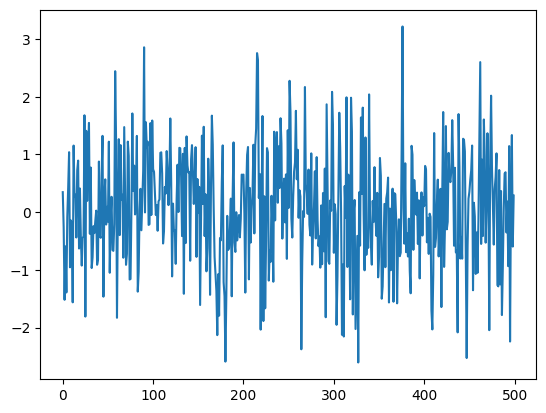

In [3]:
# Simulating White Noise
import numpy as np
import matplotlib.pyplot as plt

noise = np.random.normal(loc = 0, scale = 1, size = 500)
# The loc argument is the mean and the scale argument is the standard deviation.
plt.plot(noise)

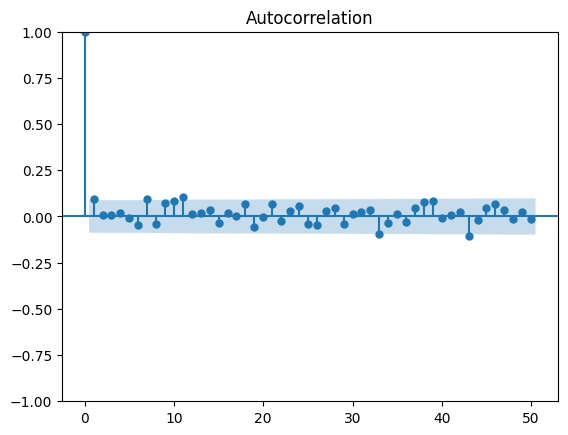

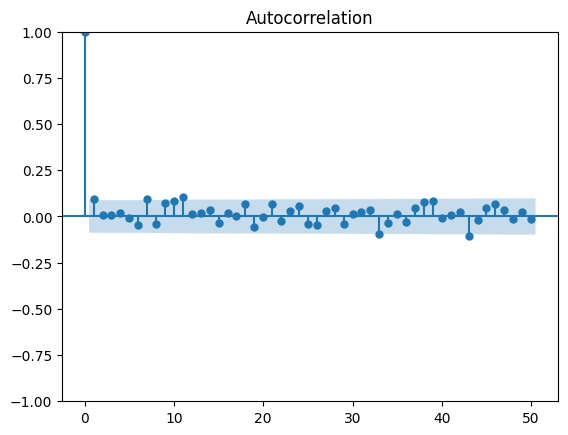

In [8]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(noise, lags = 50)

### Can´t Forecast White Noise

A white noise time series is simply a sequence of uncorrelated random variables that are identically distributed. Stock returns are often modeled as white noise. Unfortunately, for white noise, we cannot forecast future observations based on the past - autocorrelations at all lags are zero.

You will generate a white noise series and plot the autocorrelation function to show that it is zero for all lags. You can use np.random.normal() to generate random returns. For a Gaussian white noise process, the mean and standard deviation describe the entire process.

The mean is 0.022 and the standard deviation is 0.051


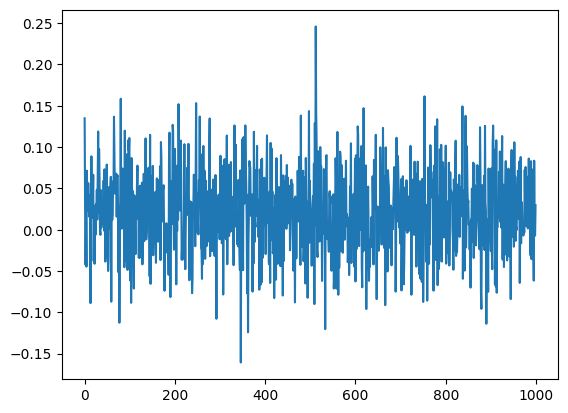

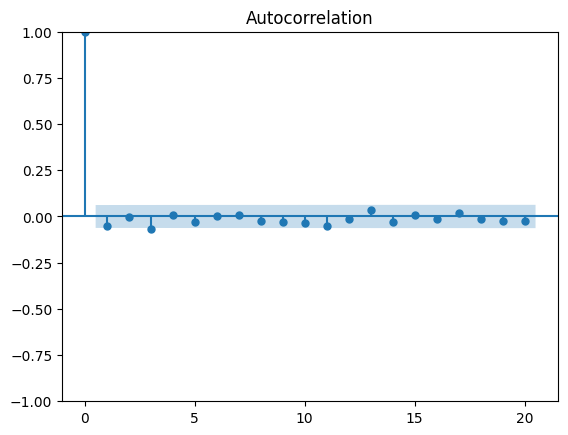

In [9]:
# Import the plot_acf module from statsmodels
from statsmodels.graphics.tsaplots import plot_acf

# Simulate white noise returns
returns = np.random.normal(loc=0.02, scale=0.05, size=1000)

# Print out the mean and standard deviation of returns
mean = np.mean(returns)
std = np.std(returns)
print("The mean is %5.3f and the standard deviation is %5.3f" %(mean,std))

# Plot returns series
plt.plot(returns)
plt.show()

# Plot autocorrelation function of white noise returns
plot_acf(returns, lags=20)
plt.show()

## Random walk

- Today´s Price = Yesterday´s Price + Noise
$$P_{t} = P_{t-1} + \epsilon_{t}$$

- Change in price is white noise
$$P_{t}-P_{t-1} = \epsilon_{t}$$

Incidentally, if prices are in logs, then the difference in log prices is one way to measure returns. The bottom line is that if stock prices follow a random walk, then stock returns are White Noise.

- Can´t forecast a random walk.
- Best forecast for tomorow´s price is today´s price.

In a random walk with drift, prices on average drift by mu every period.
- Random walk with drift:
$$P_{t} = \mu + P_{t-1} + \epsilon_{t}$$
- Change in price is white noise with non-zero mean:
$$P_{t} - P_{t-1} = \mu + \epsilon_{t}$$

So if we now think of stock price as a random walk with drift, then the returns are still white noise, but an average return of mu instead of zero.

To test wheaher a series like stock prices follows a random walk, you can regress current prices on lagged prices.
- Random walk with drift:
$$P_{t} = \mu + P_{t-1} + \epsilon_{t}$$
- Regression test for random walk:
$$P_{t} = \alpha + \beta P_{t-1} + \epsilon_{t}$$
- Test:
$$H_0 : \beta = 1 (random walk)$$ 
$$H_0 : \beta < 1 (not random walk)$$ 

If the slope coefficient, beta, is not significantly different from one, then we cannot reject the null hypotesis that the series is a random walk. However, if the slope coefficient is significantly less than one, then we can reject the null hypotesis that the series is a random walk.

An identicall way to do that test is to regress the difference in prices on the lagged price, and instead wheater the slope coefficient is 1, now we test wheater it is zero. This is called the "Dickey-Fuller" test.

- Regression test for random walk:
$$P_{t} = \alpha + \beta P_{t-1} + \epsilon_{t}$$
- Equivalent to:
$$P_{t} - P_{t-1} = \alpha + \beta P_{t-1} + \epsilon_{t}$$
- Test:
$$H_0 : \beta = 0 (random walk)$$ 
$$H_0 : \beta < 0 (not random walk)$$ 
- If you add more lagged changes on the right hand side, it´s the Augmented Dickey-Fuller test.

In [ ]:
# Import module from stats models
from statsmodels.tsa.stattools import adfuller

# Run Augmented Dickey-Test.
resutls = adfuller(x)

#Print p-value
print(results[1])

# Print full results
print(results)

In [ ]:
# Import module from stats models
from statsmodels.tsa.stattools import pperron

# Run Phillips-Perron Test
results = pperron(x)

# Print p-value
print(results[1])

# Print full results
print(results)

If the p-value is less than 5%, we can reject the null hypothesis that the series is a random walk with 95% confidence.

#### Cómo se si una serie de tiempo es estacionaria o no estacionaria, por ejemplo, ¿el tipo de cambio peso dolar es estacionario?

Para determinar si una serie de tiempo es estacionaria o no estacionaria, se pueden realizar dos tipos de pruebas: pruebas gráficas y pruebas estadísticas.

En la prueba gráfica, se grafica la serie de tiempo y se observa si hay alguna tendencia clara en la media o en la varianza de la serie a lo largo del tiempo. Si la serie de tiempo muestra una tendencia clara en la media o en la varianza, entonces se considera que la serie no es estacionaria. Por el contrario, si la serie de tiempo parece fluctuar alrededor de una media constante y la varianza parece ser constante en el tiempo, entonces se considera que la serie es estacionaria.

En la prueba estadística, se utilizan pruebas como la prueba de Dickey-Fuller aumentada (ADF) o la prueba de Phillips-Perron (PP) para verificar si una serie de tiempo es estacionaria o no. Estas pruebas se basan en la idea de que si una serie de tiempo es estacionaria, entonces su media y varianza son constantes a lo largo del tiempo y la relación entre las observaciones es constante en el tiempo. La prueba estadística se utiliza para verificar si hay una relación de cointegración entre la serie y una tendencia determinística.

En el caso del tipo de cambio peso-dólar, es necesario realizar ambas pruebas para determinar si es estacionario o no. Sin embargo, en general, se espera que este tipo de serie de tiempo no sea estacionaria debido a los cambios en las tasas de interés, los eventos políticos y económicos, y otros factores que afectan el tipo de cambio en el corto plazo. Es probable que se necesite diferenciar la serie de tiempo para obtener una versión estacionaria para el modelado y análisis de la serie.

#### Qué significa que en una serie de tiempo exista una raíz unitaria

En una serie de tiempo, una raíz unitaria significa que hay una dependencia de largo plazo entre las observaciones. En otras palabras, una raíz unitaria indica que la serie de tiempo no es estacionaria.

Una raíz unitaria es un término técnico utilizado en econometría para describir una serie de tiempo que no ha sido diferenciada o que ha sido diferenciada insuficientemente. Si una serie de tiempo tiene una raíz unitaria, significa que los valores anteriores de la serie tienen un efecto duradero y acumulativo sobre los valores actuales de la serie.

Por ejemplo, si una serie de tiempo representa los precios de las acciones de una empresa, una raíz unitaria indica que los precios de las acciones en el pasado tienen un impacto duradero en los precios actuales, incluso después de haber tenido en cuenta otros factores que puedan haber afectado el precio. En otras palabras, una raíz unitaria sugiere que los precios de las acciones están "arrastrando" valores de precios anteriores y no están respondiendo de forma independiente a las condiciones actuales del mercado.

Una serie de tiempo con una raíz unitaria puede ser difícil de modelar y predecir porque las fluctuaciones a corto plazo pueden ser enmascaradas por la dependencia de largo plazo entre las observaciones. Por lo tanto, es importante verificar la presencia de una raíz unitaria en una serie de tiempo antes de intentar modelarla o predecirla. La prueba de Dickey-Fuller aumentada (ADF) es una prueba estadística comúnmente utilizada para detectar la presencia de una raíz unitaria en una serie de tiempo.

#### Me puedes explicar la prueba Dikey-Fuller aumentata para comprobar si una serie es estacionaria o no estacionaria.

La prueba de Dickey-Fuller aumentada (ADF) es una prueba estadística que se utiliza para determinar si una serie de tiempo es estacionaria o no. La prueba se basa en la idea de que si una serie de tiempo es estacionaria, entonces su media y varianza son constantes a lo largo del tiempo y la relación entre las observaciones es constante en el tiempo.

La prueba ADF es una extensión de la prueba de Dickey-Fuller original y tiene en cuenta la posibilidad de que haya una correlación entre las observaciones de la serie de tiempo. La prueba ADF utiliza un modelo de regresión para determinar si la serie de tiempo es estacionaria o no. El modelo de regresión utilizado por la prueba ADF es:

$$y_t = \mu + \phi_{1} y_(t-1) + \phi_{2} y_(t-2) + ... + \phi_{p} y_(t-p) + \delta t + \epsilon_{t}$$

donde y_t es el valor de la serie de tiempo en el momento t, c es una constante, $\phi_1$, $\phi_2$,..., $\phi_p$ son los coeficientes de la regresión que representan la relación entre los valores anteriores de la serie y el valor actual, $\delta$ es la tendencia de la serie y $\epsilon_t$ es el error aleatorio en el momento t.

La hipótesis nula de la prueba ADF es que la serie de tiempo no es estacionaria, lo que significa que la raíz unitaria está presente en la serie de tiempo. La hipótesis alternativa es que la serie de tiempo es estacionaria, lo que significa que no hay raíz unitaria en la serie de tiempo.

La prueba ADF se utiliza para determinar si se puede rechazar la hipótesis nula. Si el valor p asociado con la prueba es menor que el nivel de significancia establecido (generalmente 0.05), entonces se rechaza la hipótesis nula y se concluye que la serie de tiempo es estacionaria. Por el contrario, si el valor p es mayor que el nivel de significancia, entonces no se puede rechazar la hipótesis nula y se concluye que la serie de tiempo es no estacionaria.

En resumen, la prueba ADF es una prueba estadística que se utiliza para determinar si una serie de tiempo es estacionaria o no. La prueba utiliza un modelo de regresión y se basa en la idea de que si una serie de tiempo es estacionaria, entonces su media y varianza son constantes a lo largo del tiempo y la relación entre las observaciones es constante en el tiempo.

#### En qué consiste la prueba Phillips-Perron(PP) y cuál es la diferencia entre la prueba ADF

La prueba Phillips-Perron (PP) es una prueba estadística utilizada para determinar la presencia de una raíz unitaria en una serie de tiempo. Al igual que la prueba de Dickey-Fuller Aumentada (ADF), la prueba PP es una extensión de la prueba de Dickey-Fuller original.

La principal diferencia entre la prueba ADF y la prueba PP es que la prueba PP utiliza una forma modificada de la regresión de Dickey-Fuller que tiene en cuenta la autocorrelación serial en la serie de tiempo. La prueba PP también utiliza una estimación robusta de la varianza para abordar la posible heterocedasticidad en la serie de tiempo.

La hipótesis nula de la prueba PP es que la serie de tiempo tiene una raíz unitaria, lo que significa que la serie de tiempo es no estacionaria. La hipótesis alternativa es que la serie de tiempo es estacionaria, lo que significa que no hay raíz unitaria en la serie de tiempo.

Al igual que la prueba ADF, la prueba PP proporciona un valor p que se compara con un nivel de significancia para determinar si se puede rechazar la hipótesis nula. Si el valor p es menor que el nivel de significancia, entonces se rechaza la hipótesis nula y se concluye que la serie de tiempo es estacionaria. Si el valor p es mayor que el nivel de significancia, entonces no se puede rechazar la hipótesis nula y se concluye que la serie de tiempo es no estacionaria.

En general, tanto la prueba ADF como la prueba PP son pruebas útiles para determinar la estacionariedad de una serie de tiempo. La elección entre las pruebas dependerá de la autocorrelación serial y la heterocedasticidad en la serie de tiempo y de la precisión requerida en los resultados. En general, la prueba PP es más adecuada cuando hay autocorrelación serial en la serie de tiempo y cuando se requiere una estimación más robusta de la varianza.

Una estimación más robusta de la varianza es una técnica estadística que busca reducir el impacto de los valores atípicos o errores de medición en la estimación de la varianza de una muestra.

La varianza es una medida de dispersión de los datos en una muestra. Una estimación robusta de la varianza es importante cuando hay valores atípicos o errores de medición que pueden afectar significativamente la estimación de la varianza. Estos valores atípicos o errores de medición pueden tener un impacto desproporcionado en la estimación de la varianza utilizando la técnica estándar de la media cuadrática de las desviaciones de cada punto respecto a la media de la muestra.

Una estimación más robusta de la varianza utiliza métodos estadísticos que reducen el efecto de estos valores atípicos o errores de medición en la estimación de la varianza. Esto puede incluir el uso de estadísticos de orden más alto, como la mediana en lugar de la media, o la utilización de técnicas de suavizado, como la suavización kernel o el suavizado por loess. También se pueden utilizar métodos de estimación que utilizan pesos diferentes para cada observación en función de su grado de influencia en la estimación de la varianza.

En resumen, una estimación más robusta de la varianza busca producir una estimación más precisa y fiable de la varianza de una muestra, reduciendo el impacto de los valores atípicos o errores de medición. Esto puede ser especialmente importante en situaciones en las que se espera que haya valores atípicos o errores de medición en la muestra.

### Generate a Random Walk

Whereas stock returns are often modeled as white noise, stock prices closely follow a **random walk**. In other words, **today's price is yesterday's price plus some random noise**.

You will simulate the price of a stock over time that has a starting price of 100 and every day goes up or down by a random amount. Then, plot the simulated stock price. If you hit the "Run Code" code button multiple times, you'll see several realizations.

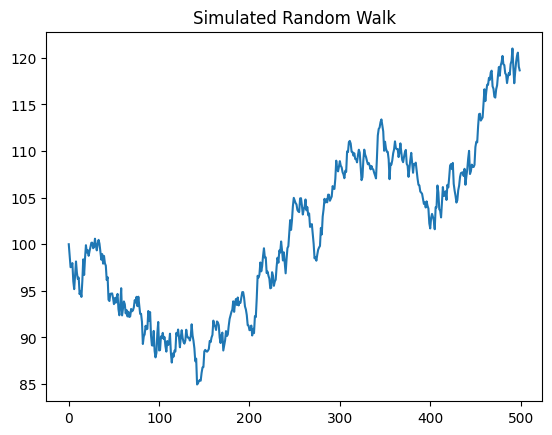

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Generate 500 random steps with mean=0 and standar deviation =1
steps = np.random.normal(loc = 0, scale = 1, size = 500)

# Set first elemento to 0 so that the first price will be the starting stock price
steps[0] = 0

# Simulate stock prices, P with a starting price of 100
P = 100 + np.cumsum(steps)

# Plot the simulated stock prices
plt.plot(P)
plt.title("Simulated Random Walk")
plt.show()





### Get the drift

In the last exercise, you simulated stock prices that follow a random walk. You will extend this in two ways in this exercise.

- You will look at a random walk with a drift. Many time series, like stock prices, are random walks but tend to drift up over time.
- In the last exercise, the noise in the random walk was additive: random, normal changes in price were added to the last price. However, when adding noise, you could theoretically get negative prices. Now you will make the noise multiplicative: you will add one to the random, normal changes to get a total return, and multiply that by the last price.

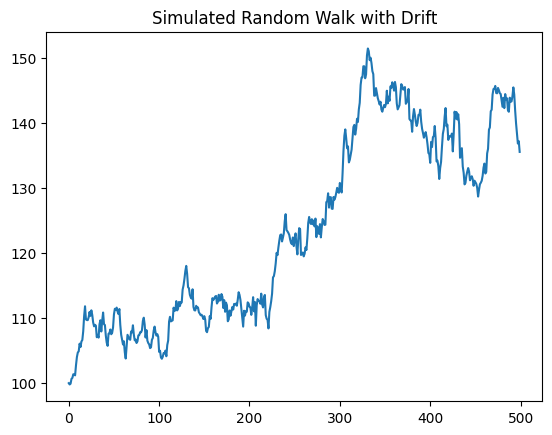

In [5]:
# Generate 500 random steps
steps = np.random.normal(loc=0.001, scale=0.01, size= 500) + 1

# Set first element to 1
steps[0]=1

# Simulate the stock price, P, by taking the cumulative product
P = 100 * np.cumprod(steps)

# Plot the simulated stock prices
plt.plot(P)
plt.title("Simulated Random Walk with Drift")
plt.show()

### Are Stock Prices a Random Walk?

Most stock prices follow a random walk (perhaps with a drift). You will look at a time series of Amazon stock prices, pre-loaded in the DataFrame AMZN, and run the 'Augmented Dickey-Fuller Test' from the statsmodels library to show that it does indeed follow a random walk.

With the ADF test, the "null hypothesis" (the hypothesis that we either reject or fail to reject) is that the series follows a random walk. Therefore, a low p-value (say less than 5%) means we can reject the null hypothesis that the series is a random walk.

In [ ]:
# Import the adfuller module from statsmodels
from statsmodels.tsa.stattools import adfuller

# Run the ADF test on the price series and print out the results
results = adfuller(AMZN["Adj Close"])
print(results)

# Just print out the p-value
print('The p-value of the test on prices is: ' + str(results[1]))

According to this test, we cannot reject the hypothesis that Amazon prices follow a random walk. In the next exercise, you'll look at Amazon returns.

### How About Stock Returns?

In the last exercise, you showed that Amazon stock prices, contained in the DataFrame AMZN follow a random walk. In this exercise. you will do the same thing for Amazon returns (percent change in prices) and show that the returns do not follow a random walk.

In [ ]:
# Import the adfuller module from statsmodels
from statsmodels.tsa.stattools import adfuller

# Create a DataFrame of AMZN returns
AMZN_ret = AMZN.pct_change()

# Eliminate the NaN in the first row of returns
AMZN_ret = AMZN_ret.dropna()

# Run the ADF test on the return series and print out the p-value
results = adfuller(AMZN_ret["Adj Close"])
print('The p-value of the test on returns is: ' + str(results[1]))

The p-value is extremely small, so we can easily reject the hypothesis that returns are a random walk at all levels of significance.

## Stationarity

There are different ways to define stationarity, but in its strictest sense, it means that the join distribution of the observations do not depend on time. 

A less restrictive version of stationarity, and one that is easier to test is week stationarity, which just means that the mean, variance, and autocorrelations of the observations do not depend on time.

- Strong stationarity: entire distribution of data is time-invariant.
- Weak stationarity: mean, variance and autocorrelation are time-invariant (i.e., autocorrelation, $corr(X_{t}, X_{t-\tau})$ only a function of $\tau$).

If a process is not stationary, then it becomes difficult to model. Modeling involves estimating a set of parameters, and if a process is not stationary, and the parameters are different at each point in time, then there are too many parameters to estimate.

- If parameters vary with time, too many parameters to estimate.
- Can only estimate a parsimonius model with a few parameters.

**So stationarity is necessary for a parsimonious model, one with a smaller set of parameters to estimate.**

A random walk is a common type of non-stationary series. The variance grows with time. For exmple, if stock prices are a random walk, then the uncertainty about prices tomorrow is much less than the uncertainty 10 years from now.

Many non-stationary series can be made stationary through a simple transformation. A Random Walk is a non.stationary series, but if you take the first differences, the new series is White Noise, which is stationary.

#### ¿ Cual es la diferencia entre Random Walk y White Noise en las series de tiempo?

Tanto el random walk (paseo aleatorio) como el white noise (ruido blanco) son procesos estocásticos que se utilizan en el análisis de series de tiempo.

El random walk es un proceso en el que el valor de la variable en el tiempo t depende del valor en el tiempo t-1 más un término de error aleatorio. Es decir, el random walk se define por una sucesión de valores que se generan como una acumulación de incrementos aleatorios. En otras palabras, un random walk implica que los cambios en el valor de la serie de tiempo son en gran parte impredecibles, y la serie puede mostrar tendencias o patrones que se mantienen en el tiempo.

Por otro lado, el white noise es un proceso en el que el valor de la variable en cada instante de tiempo se genera de manera completamente aleatoria e independiente de cualquier valor previo. En otras palabras, el ruido blanco implica que no hay patrones ni tendencias en la serie de tiempo, y que los valores en cada instante de tiempo son completamente aleatorios e independientes.

En resumen, mientras que el random walk implica una acumulación de incrementos aleatorios que pueden mostrar tendencias o patrones, el white noise implica valores aleatorios e independientes en cada instante de tiempo, sin tendencias ni patrones.

### Seasonal Adjustment During Tax Season

Many time series exhibit strong seasonal behavior. The procedure for removing the seasonal component of a time series is called seasonal adjustment. For example, most economic data published by the government is seasonally adjusted.

You saw earlier that by taking first differences of a random walk, you get a stationary white noise process. For seasonal adjustments, instead of taking first differences, you will take differences with a lag corresponding to the periodicity.

Look again at the ACF of H&R Block's quarterly earnings, pre-loaded in the DataFrame HRB, and there is a clear seasonal component. The autocorrelation is high for lags 4,8,12,16,… because of the spike in earnings every four quarters during tax season. Apply a seasonal adjustment by taking the fourth difference (four represents the periodicity of the series). Then compute the autocorrelation of the transformed series.

In [ ]:
# Import the plot_acf module from statsmodels
from statsmodels.graphics.tsaplots import plot_acf

# Seasonally adjust quarterly earnings
HRBsa = HRB.diff(4)

# Print the first 10 rows of the seasonally adjusted series
print(HRBsa.head(10))

# Drop the NaN data in the first four rows
HRBsa = HRBsa.dropna()

# Plot the autocorrelation function of the seasonally adjusted series
plot_acf(HRBsa)
plt.show()

By seasonally adjusting the series, we eliminated the seasonal pattern in the autocorrelation function.

# Autorregressice (AR) Models

In this chapter you'll learn about autoregressive, or AR, models for time series. These models use past values of the series to predict the current value.

In an Autorregresice model, or AR model, today´s value equals a mean plus a fractional phi of yesterday´s value, plus noise. 

- $R_{t} = \mu + \phi R_{t-1} + \epsilon_{t}$

Since there is only one lagged value on the right hand side, this is called an AR model of order 1, or simply an AR(1) model. If the AR parameter, $\phi$, is one, the te process is a random walk. If $\phi$ is zero, then the process is white noise. In order for the process to be stable an stationarity, phi has to be between -1 and +1.

- Random Walk: $\phi = 1$
- White Noise: $\phi = 0$
- For stationarity: $-1 < \phi < 1$

As an exmaple, suppose $R_t$ is a time series of stock returns. If $\phi$ is negative, then a positive return last period, at time $t-1$, implies that this period´s return is more likely to be negative. This eas referred to as "mean reversion". On the other hand, if phi es positive, then a positive return last period implies that this period´s return is expected to be positive. This was referred to as "momentum".

- Negative $\phi$: Mean Reversion.
- Positive $\phi$: Momentum.

The model can be extender to include more lagged values and $\phi$ parameters.

- AR(1):
    $$R_{t} = \mu + \phi R_{t-1} + \epsilon_{t}$$

- AR(2):
    $$R_{t} = \mu + \phi R_{t-1} +  \phi R_{t-2} + \epsilon_{t}$$
    
- AR(3):
    $$R_{t} = \mu + \phi R_{t-1} +  \phi R_{t-2} + \epsilon_{t}$$
    
Often if you want to study and understand a pure AR process, it is usefull to work with simulated data. Statsmodels provides modules for simulating AR processes.

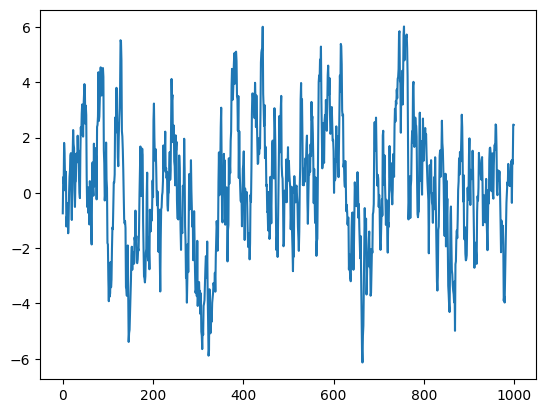

In [5]:
# First import the class, ArmaProcess.
from statsmodels.tsa.arima_process import ArmaProcess
import numpy as np
import matplotlib.pyplot as plt

# Then define the order and parameters of the AR process.
# The convention is a little conterintuitive:
    # You must include the zero-log coefficient of 1, and the sign
    # of the other coefficient is the opposite of what we have been using
ar = np.array([1, -0.9])
ma = np.array([1])

AR_object = ArmaProcess(ar, ma)

# To simulate data, use the method generate_sample, with the number of simulated samples as an argument.
simulate_data = AR_object.generate_sample(nsample = 1000)

# Plot the resutls
plt.plot(simulate_data)

## Simulate AR(1) Time Series

You will simulate and plot a few AR(1) time series, each with a different parameter, $\phi$, using the arima_process module in statsmodels. In this exercise, you will look at an AR(1) model with a large positive $\phi$ and a large negative $\phi$, but feel free to play around with your own parameters.

There are a few conventions when using the arima_process module that require some explanation. First, these routines were made very generally to handle both AR and MA models. We will cover MA models next, so for now, just ignore the MA part. Second, when inputting the coefficients, you must include the zero-lag coefficient of 1, and the sign of the other coefficients is opposite what we have been using (to be consistent with the time series literature in signal processing). For example, for an AR(1) process with 
, the array representing the AR parameters would be **ar = np.array([1, -0.9])**.

The two AR parameters produce very different looking time series plots, but in the next exercise you'll really be able to distinguish the time series.

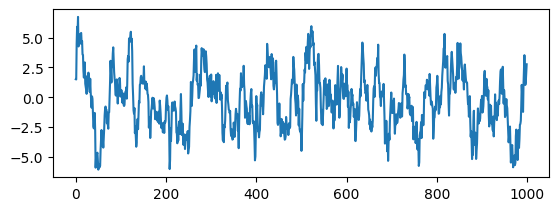

In [16]:
# import the module for simulating data
from statsmodels.tsa.arima_process import ArmaProcess
import numpy as np
import matplotlib.pyplot as plt

# Plot 1: AR parameter = +0.9
plt.subplot(2,1,1)
ar1 = np.array([1, -0.9])
ma1 = np.array([1])
AR_object1 = ArmaProcess(ar1, ma1)
simulated_data_1 = AR_object1.generate_sample(nsample=1000)
plt.plot(simulated_data_1)

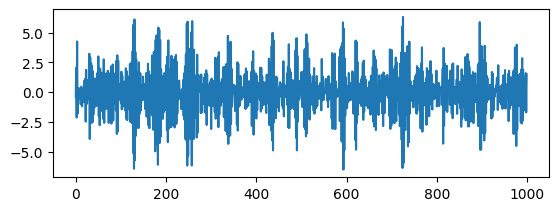

In [7]:
# import the module for simulating data
from statsmodels.tsa.arima_process import ArmaProcess
import numpy as np
import matplotlib.pyplot as plt

# Plot 2: AR parameter = -0.9
plt.subplot(2,1,2)
ar2 = np.array([1, 0.9])
ma2 = np.array([1])
AR_object2 = ArmaProcess(ar2, ma2)
simulated_data_2 = AR_object2.generate_sample(nsample=1000)
plt.plot(simulated_data_2)
plt.show()

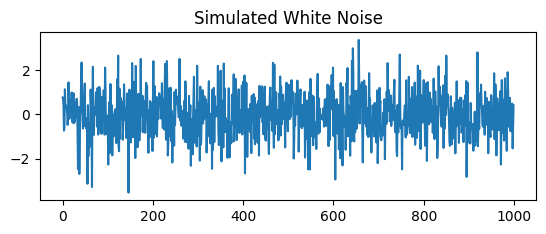

In [10]:
# import the module for simulating data
from statsmodels.tsa.arima_process import ArmaProcess
import numpy as np
import matplotlib.pyplot as plt

# Plot 3: AR parameter = 0
plt.subplot(2,1,2)
ar3 = np.array([1, 0])
ma3 = np.array([1])
AR_object3 = ArmaProcess(ar3, ma3)
simulated_data_3 = AR_object3.generate_sample(nsample=1000)
plt.plot(simulated_data_3)
plt.title("Simulated White Noise")
plt.show()

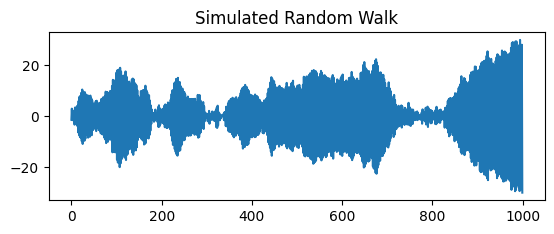

In [11]:
# import the module for simulating data
from statsmodels.tsa.arima_process import ArmaProcess
import numpy as np
import matplotlib.pyplot as plt

# Plot 3: AR parameter = 0
plt.subplot(2,1,2)
ar4 = np.array([1, 1])
ma4 = np.array([1])
AR_object4 = ArmaProcess(ar4, ma4)
simulated_data_4 = AR_object4.generate_sample(nsample=1000)
plt.plot(simulated_data_4)
plt.title("Simulated Random Walk")
plt.show()

Tanto el random walk (paseo aleatorio) como el white noise (ruido blanco) son procesos estocásticos que se utilizan en el análisis de series de tiempo.

El random walk es un proceso en el que el valor de la variable en el tiempo t depende del valor en el tiempo t-1 más un término de error aleatorio. Es decir, el random walk se define por una sucesión de valores que se generan como una acumulación de incrementos aleatorios. En otras palabras, un random walk implica que los cambios en el valor de la serie de tiempo son en gran parte impredecibles, y la serie puede mostrar tendencias o patrones que se mantienen en el tiempo.

Por otro lado, el white noise es un proceso en el que el valor de la variable en cada instante de tiempo se genera de manera completamente aleatoria e independiente de cualquier valor previo. En otras palabras, el ruido blanco implica que no hay patrones ni tendencias en la serie de tiempo, y que los valores en cada instante de tiempo son completamente aleatorios e independientes.

En resumen, mientras que el random walk implica una acumulación de incrementos aleatorios que pueden mostrar tendencias o patrones, el white noise implica valores aleatorios e independientes en cada instante de tiempo, sin tendencias ni patrones.

## Compare the ACF for Several AR Time Series

The autocorrelation function decays exponentially for an AR time series at a rate of the AR parameter. For example, if the AR parameter, $\phi = +0.9$, the first-lag autocorrelation will be 0.9, the second will be $(0.9)^2 = 0.81$, the third-lag will be $(0.9)^3=0.729$, etc. A smaller AR parameter will have a steeper decay and for negative AR parameter will flip signs, so the first-lag autocorrelación will be $-0.9$, the second-lag will be $(-0.9)^2 = 0.81$, the third-lag will be $(-0.9)^3 = 0.729$, etc.

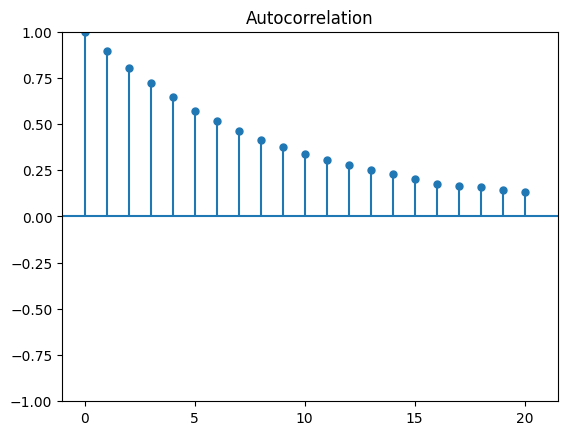

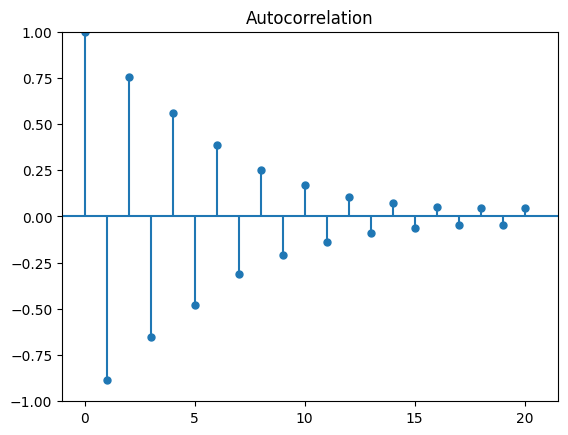

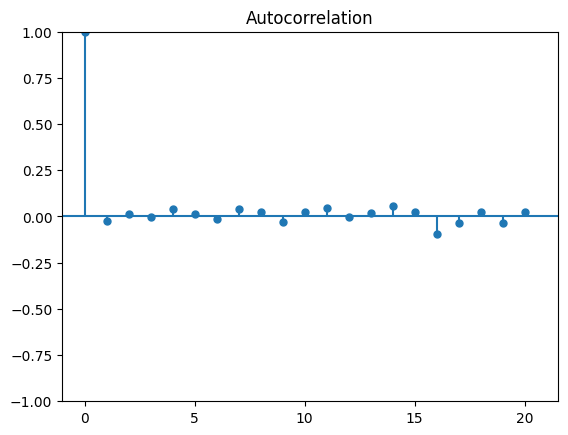

In [12]:
# Import the plot_acf module from statsmodels
from statsmodels.graphics.tsaplots import plot_acf

# Plot 1: AR parameter = +0.9
plot_acf(simulated_data_1, alpha=1, lags=20)
plt.show()

# Plot 2: AR parameter = -0.9
plot_acf(simulated_data_2, alpha=1, lags=20)
plt.show()

# Plot 3: AR parameter = +0.3
plot_acf(simulated_data_3, alpha=1, lags=20)
plt.show()

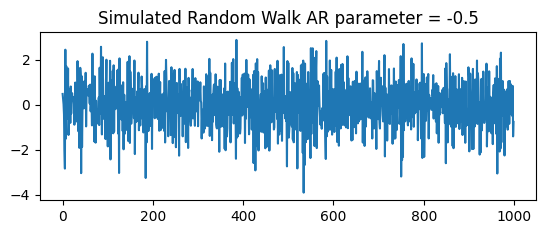

In [14]:
# import the module for simulating data
from statsmodels.tsa.arima_process import ArmaProcess
import numpy as np
import matplotlib.pyplot as plt

# AR parameter = -0.5
plt.subplot(2,1,2)
ar5 = np.array([1, 0.5])
ma5 = np.array([1])
AR_object5 = ArmaProcess(ar5, ma5)
simulated_data_5 = AR_object5.generate_sample(nsample=1000)
plt.plot(simulated_data_5)
plt.title("Simulated Random Walk AR parameter = -0.5")
plt.show()

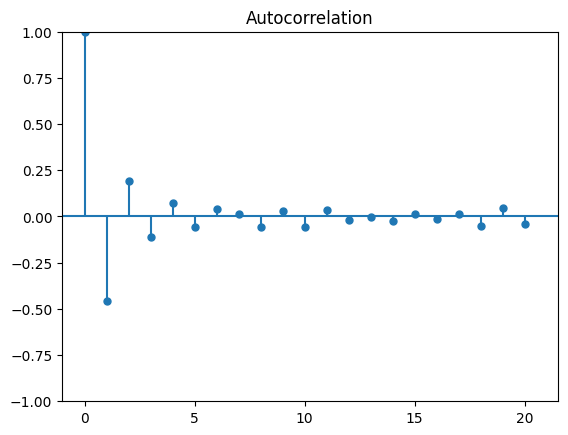

In [15]:
# Import the plot_acf module from statsmodels
from statsmodels.graphics.tsaplots import plot_acf

# Plot AR parameter = -0.5
plot_acf(simulated_data_5, alpha=1, lags=20)
plt.show()

## Estimating and Forecasting an AR Model

Statsmodels has another module for estimating the parameters of a given AR model.

The statsmodels class ARMA has been deprecated and replaced with the slightly more general ARIMA class. After importing ARIMA, create an instance of that class called mod, with the arguments being the data that you´re trying to fit, and the order of the model. The order (1,0,0) means you´re fitting the data to an AR(1) model. An order (2,0,0) would mean you´re fitting the data to an AR(2) model. The middle number, d, relates towhether you take first differences of the data to make the time series stationary, like you do with a random walk. For now, we´ll assume there are no first differences so the middle number will be zero. In the last chapter, we will give an example where we do take first differences. The thirs number, q, es the MA part, which will be discussed in the next chapter. Once you instantiate the class, you can use the method fit to estimate the model, and store the results in result.

In [ ]:
# To estimate parameters forms data (simulated)
from statsmodels.tsa.arima_model import ARMA
mod = ARMA(data, order = (1,0))
result = mod.fit()

# ARMA has been deprecated and replaces with ARIMA model.
from statsmodels.tsa.arima.model import ARIMA
mod = ARIMA(data, order = (1,0,0))
result = mod.fit()

# Full output
print(result.summary())

# Only the params
print(result.params)

#### ¿Cuál es la diferencia entre un modelo ARMA y un modelo ARIMA?

Tanto el modelo ARMA (Autoregressive Moving Average) como el modelo ARIMA (Autoregressive Integrated Moving Average) son modelos utilizados en el análisis de series de tiempo para modelar y predecir valores futuros de una serie de tiempo. La principal diferencia entre ellos es que el modelo ARIMA incluye un término de integración, lo que lo hace más flexible que el modelo ARMA.

El modelo ARMA se compone de dos componentes: un modelo autoregresivo (AR) y un modelo de media móvil (MA). El modelo AR se refiere a la relación entre los valores anteriores de la serie de tiempo y el valor actual, mientras que el modelo MA se refiere a la relación entre los errores anteriores y el error actual en la predicción. En conjunto, el modelo ARMA se utiliza para modelar series de tiempo que tienen una media constante y una varianza constante en el tiempo.

El modelo ARIMA, por otro lado, es un modelo ARMA que se ha extendido para incluir un término de integración. Este término se refiere a la cantidad de veces que se debe diferenciar la serie de tiempo para hacerla estacionaria. Una serie de tiempo estacionaria es aquella en la que la media y la varianza son constantes en el tiempo. El término de integración en el modelo ARIMA se utiliza para transformar una serie de tiempo no estacionaria en una estacionaria, lo que permite la aplicación del modelo ARMA.

En resumen, mientras que el modelo ARMA se utiliza para modelar series de tiempo estacionarias, el modelo ARIMA se utiliza para modelar series de tiempo no estacionarias a través de la inclusión de un término de integración. El modelo ARIMA es, por lo tanto, más flexible que el modelo ARMA, ya que puede manejar una variedad más amplia de series de tiempo.

In [ ]:
# Forecasting With an AR Model
from statsmodels.graphics.tsaplots import plot_predict

fig, ax = plot.subplots()
data.plot(ax=ax)
plot_predict(result, start = "2012-09-27", end = "2012-10-06", ax=ax)
plt.show()

- Arguments of function plot_predict()
    - First argument is fitted model
    - Set alpha = None for no confidence interval
    - Set ax=ax to plot the data and predict some axes.

### Estimating an AR Model

You will estimate the AR(1) parameter, $\phi$, of one of the simulated series that you generated in the earlier exercise. Since the parameters are known for a simulated series, it is a good way to understand the estimation routines before applying it to real data.

For simulated_data_1 with a true of 0.9, you will print out the estimate of $\phi$. In addition, you will also print out the entire output that is produced when you fit a time series, so you can get an idea of what other tests and summary statistics are available in statsmodels.

In [17]:
# Import the ARIMA module from statsmodels
from statsmodels.tsa.arima.model import ARIMA

# Fit an AR(1) model to the first simulated data
mod = ARIMA(simulated_data_1, order= (1,0,0))
res = mod.fit()

# Print out summary information on the fit
print(res.summary())

# Print out the estimate for phi
print("When the true phi=0.9, the estimate of phi is:")
print(res.params[1])

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1000
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -1422.463
Date:                Wed, 12 Apr 2023   AIC                           2850.927
Time:                        19:38:35   BIC                           2865.650
Sample:                             0   HQIC                          2856.522
                               - 1000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2216      0.340     -0.651      0.515      -0.889       0.446
ar.L1          0.9073      0.014     67.116      0.000       0.881       0.934
sigma2         1.0053      0.045     22.468      0.0

Notice how close the estimated parameter is to the true parameter.

### Forecasting with an AR Model

In addition to estimating the parameters of a model that you did in the last exercise, you can also do forecasting, both in-sample and out-of-sample using statsmodels. The in-sample is a forecast of the next data point using the data up to that point, and the out-of-sample forecasts any number of data points in the future. You can plot the forecasted data using the function plot_predict(). You supply the starting point for forecasting and the ending point, which can be any number of data points after the data set ends.

For the simulated data in DataFrame simulated_data_1, with 
$\phi = 0.9$, you will plot out-of-sample forecasts and confidence intervals around those forecasts.

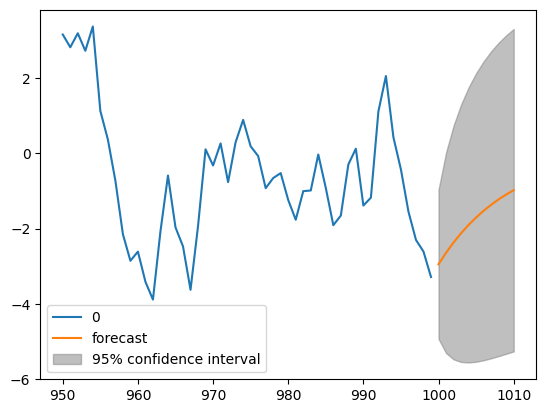

In [27]:
# Import the ARIMA and plot_predict from statsmodels
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_predict

ar1 = np.array([1, -0.9])
ma1 = np.array([1])
AR_object1 = ArmaProcess(ar1, ma1)
simulated_data_1 = AR_object1.generate_sample(nsample=1000)

simulated_data_1 = pd.DataFrame(simulated_data_1)

# Forecast the first AR(1) model
mod = ARIMA(simulated_data_1, order= (1,0,0))
res = mod.fit()

# Plot the data and the forecast
fig, ax = plt.subplots()
simulated_data_1.loc[950:].plot(ax=ax)
plot_predict(res, start=1000, end=1010, ax=ax)
plt.show()

Notice how, when $\phi$ is high like here, the forecast gradually moves to the long term mean of zero, but if phi were low, it would move much quicker to the long term mean. Try it out and see for yourself!

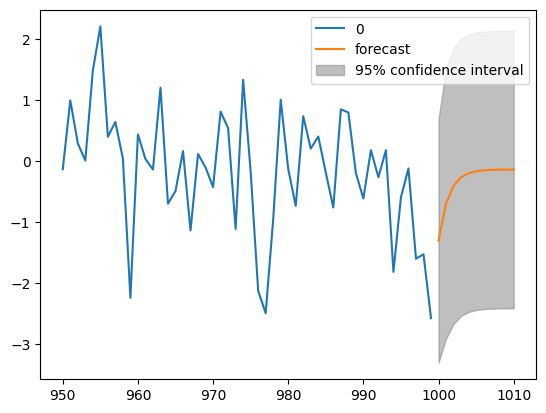

In [28]:
# Import the ARIMA and plot_predict from statsmodels
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_predict

ar1 = np.array([1, -0.5])
ma1 = np.array([1])
AR_object1 = ArmaProcess(ar1, ma1)
simulated_data_1 = AR_object1.generate_sample(nsample=1000)

simulated_data_1 = pd.DataFrame(simulated_data_1)

# Forecast the first AR(1) model
mod = ARIMA(simulated_data_1, order= (1,0,0))
res = mod.fit()

# Plot the data and the forecast
fig, ax = plt.subplots()
simulated_data_1.loc[950:].plot(ax=ax)
plot_predict(res, start=1000, end=1010, ax=ax)
plt.show()

### Let's Forecast Interest Rates

You will now use the forecasting techniques you learned in the last exercise and apply it to real data rather than simulated data. You will revisit a dataset from the first chapter: the annual data of 10-year interest rates going back 56 years, which is in a Series called interest_rate_data. Being able to forecast interest rates is of enormous importance, not only for bond investors but also for individuals like new homeowners who must decide between fixed and floating rate mortgages.

In [19]:
import pandas as pd

# Interest rate USA
interest_rate_data = pd.read_csv("C:\\Users\\parra\\Downloads\\DP_LIVE_13042023042950019.csv")
interest_rate_data = interest_rate_data[["TIME","Value"]]

In [20]:
interest_rate_data["TIME"] = pd.PeriodIndex(interest_rate_data["TIME"], freq = "Q").to_timestamp()

In [21]:
interest_rate_data = interest_rate_data.set_index("TIME")
interest_rate_data.head()

,Value
TIME,
1953-04-01,2.996667
1953-07-01,2.916667
1953-10-01,2.643333
1954-01-01,2.440000
1954-04-01,2.346667


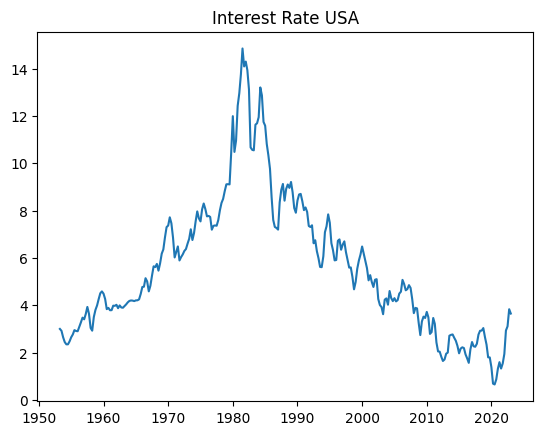

In [22]:
import matplotlib.pyplot as plt

plt.plot(interest_rate_data)
plt.title("Interest Rate USA")
plt.show()

You saw in the first chapter that there is some mean reversion in interest rates over long horizonts. In other words, when interest rates are high, they tend to drop and when they are low, they ten to rise over time. Currently, they are below long-term rates, so they are expected to rise, but an AR model attempor to quantify how much they are expected to rise.

C:\Users\parra\miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
C:\Users\parra\miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
C:\Users\parra\miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)


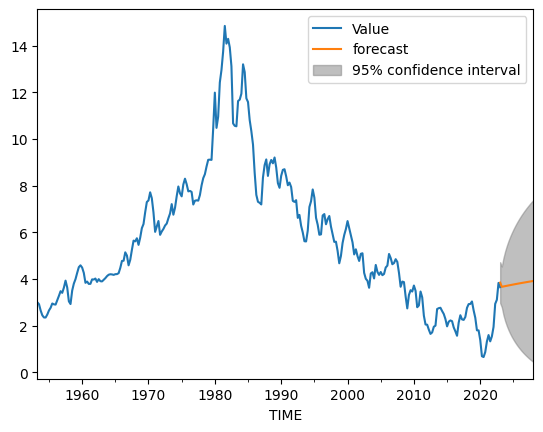

In [28]:
# Import the ARIMA and plot_predict from statsmodels
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_predict

# Forecast interest rate using AR(1) model
mod = ARIMA(interest_rate_data, order = (1,0,0))
res = mod.fit()

# Plot the data and the forecast
fig, ax = plt.subplots()
interest_rate_data.plot(ax=ax)
plot_predict(res, start = "2023", end = "2028", alpha = 0.05, ax = ax)
plt.show()

## Compare AR Model with Random Walk

Sometimes it is distinguish betewwn a time series that is slightly mean reverting and a time series that does not mean revert at all, like a random walk. You will compare the ACF for the slightly mean-reverting interest rate series od the last exercise with a simulated random walk with the same number of observations.

You should notice when plotting the autocorrelation of these two series side-by-side that they look very similar.

In [ ]:
# Import the plot_acf module from statsmodels
from statsmodels.graphics.tsaplots import plot_acf

# Plot the interest rate series and the simulated random walk series side-by-side
fig, axes = plt.subplots(2,1)

# Plot the autocorrelation of the interest rate series in the top plot
fig = plot_acf(interest_rate_data, alpha=1, lags=12, ax=axes[0])

# Plot the autocorrelation of the simulated random walk series in the bottom plot
fig = plot_acf(simulated_data, alpha=1, lags=12, ax=axes[1])

# Label axes
axes[0].set_title("Interest Rate Data")
axes[1].set_title("Simulated Random Walk Data")
plt.show()

## Choosing the Right Model

In practice, you will ordinary not be told the order of the model that you´re trying to estimate. There are two techniques that can help determine the order of the AR model: The Partial Autocorrelation Function, and the Information Criteria.

* The order of an AR(p) model will usually be unknown
* Two techniques to determine order
    * Partial Autocorrelation Function
    * Information criteria

The Partial Autocorrelation Function (PACF) measures the incremental benefit of adding another lag. Imagine running several regressions, where you regress returns on more and more lagged values. The coefficientes in the red boxes represent the values of the partial autocorrelation function for different lags. For example, in the bottom row, the coefficient in the red box, $\phi_{4,4}$, is the lag 4 value of the PACF, and it represents how significant adding a fourth lag is when you already have three lags.

$$R_{t} = \phi_{0,1} + \phi_{1,1} R_{t-1} + \epsilon_{1t}$$

$$R_{t} = \phi_{0,1} + \phi_{1,1} R_{t-1} + \phi_{2,2} R_{t-2} + \epsilon_{2t}$$

$$R_{t} = \phi_{0,1} + \phi_{1,1} R_{t-1} + \phi_{2,2} R_{t-2} + \phi_{3,3} R_{t-3} + \epsilon_{3t}$$

$$R_{t} = \phi_{0,1} + \phi_{1,1} R_{t-1} + \phi_{2,2} R_{t-2} + \phi_{3,3} R_{t-3} + \phi_{4,4} R_{t-4} + \epsilon_{4t}$$

### Plot PACF in Python

**plot_pacf** is the statsmodels function for plotting the partial autocorrelation function. The arguments are the same as that of the **plot_act** module that you saw earlier. The input x is a series or array. The argument lags indicates how many lags of the partial autocorrelation function will be plotted. And the alpha argument sets the width of the confidence interval.

* Same as ACF, but use **plot_pacf** instead **plt_acf**

In [ ]:
# Import module
from statsmodels.graphics.tsplots import plot_pacf

# Plot the PACF
plot_pacf(x, lags = 20, alpha = 0.05)

* For an AR(1) model, only the lag1 PACF is significantly different from zero.
* For an AR(2) model, two lags are different from zero.
* And for AR(3), three lags are different from zero. 
* Finally, for White Noise, there are no lags that are significantly different from zero.

### Information Criteria

The more parameters in a model, the better the model will fit the data. But this can lead to overfiting of the data. The information criteria adjust the goodnes-of-fit of a model by imposing a penalty based on the number of parameters used. Two common adjusted goodness-of-fit measures are called the Akaike Information Criterian and the Bayesian Information Criterian. In practice, the way to use the Bayesian information criterion is to fit several models, each with a different number of parameters, and choose the one with the lowest information criterion.

* Information criteria: adjust goodnes-of-fit for number of parameters
* Two popular adjusted goodness-of-fit measures
    * AIC (Akaike Information Criterion)
    * BIC (Bayesian Information Criterian)

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
mod = ARIMA(simulated_data, order = (1,0))
result = mod.fit()

result.summary()
result.params

result.aic
result.bic

C:\Users\parra\miniconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


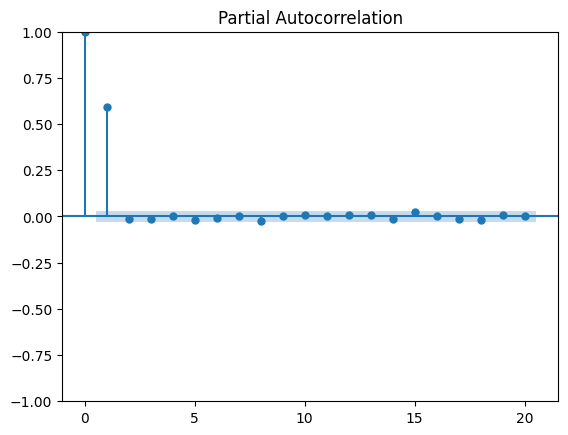

C:\Users\parra\miniconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


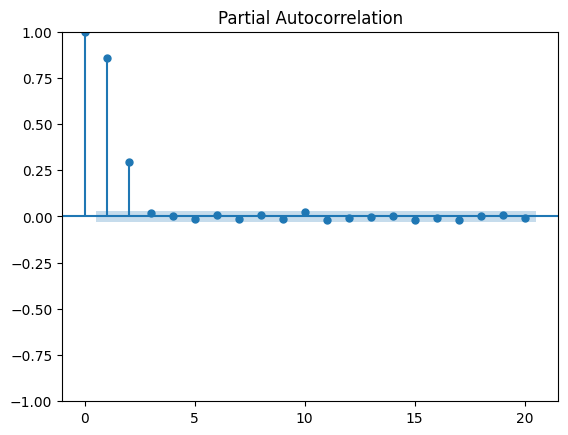

In [3]:
# Import the modules for simulating data and for plotting the PACF
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.tsaplots import plot_pacf
import numpy as np
import matplotlib.pyplot as plt

# Simulate AR(1) with phi=+0.6
ma = np.array([1])
ar = np.array([1, -0.6])
AR_object = ArmaProcess(ar, ma)
simulated_data_1 = AR_object.generate_sample(nsample=5000)

# Plot PACF for AR(1)
plot_pacf(simulated_data_1, lags=20)
plt.show()

# Simulate AR(2) with phi1=+0.6, phi2=+0.3
ma = np.array([1])
ar = np.array([1, -0.6, -0.3])
AR_object = ArmaProcess(ar, ma)
simulated_data_2 = AR_object.generate_sample(nsample=5000)

# Plot PACF for AR(2)
plot_pacf(simulated_data_2, lags=20)
plt.show()

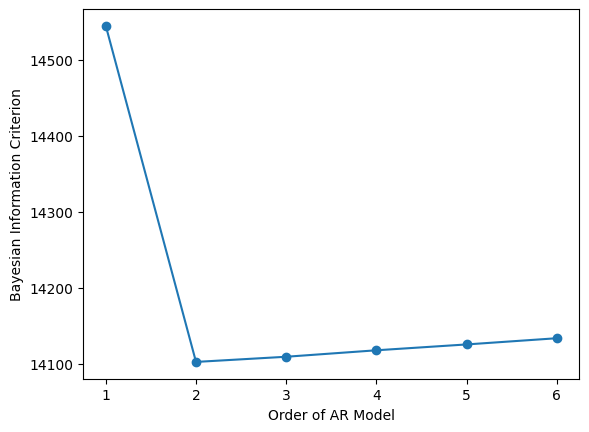

In [5]:
# Import the module for estimating an ARIMA model
from statsmodels.tsa.arima.model import ARIMA

# Fit the data to an AR(p) for p = 0,...,6 , and save the BIC
BIC = np.zeros(7)
for p in range(7):
    mod = ARIMA(simulated_data_2, order=(p,0,0))
    res = mod.fit()
# Save BIC for AR(p)    
    BIC[p] = res.bic
    
# Plot the BIC as a function of p
plt.plot(range(1,7), BIC[1:7], marker='o')
plt.xlabel('Order of AR Model')
plt.ylabel('Bayesian Information Criterion')
plt.show()

## Describe Model

In a Moving Average, or MA model, today´s value equals a mean plus noise, plus a fraction theta of yesterday´s noise.

$$R_{t} = \mu + \epsilon_{}t + \theta \epsilon_{t-1}$$

* Since only one lagged error on right hand side, this is called:
    * MA  model of order 1, or
    * MA(1) model
* MA parameter is $\theta$
    * $\theta = 0$: The process is white noise.
* MA models are stationary for all values of $\theta$.

### Interpretation of MA(1) Parameter

Suppose $R_t$ is a time series of stock returns. If thetha is negative, then a positive shock last period, represented by $\epsilon_{t-1}$, would have caused last period´s return to be positive, but this period´s return is more likely to be negative. A shock two period ago would have no effect on today return -only the shock now and las period. Also, nothe that the lag-1 autocorrelation turns out not be $\theta$, but $\theta$ over 1 plus $\theta^{2}$.

$$R_{t} = \mu + \epsilon_{t} + \theta \epsilon_{t-1}$$

* Negative $\theta$: One-Period Mean Reversion.
* Positive $\theta$: One-Period Momentum.
* Note: One period autocorrelation is: $\frac{\theta}{1 + \theta^{2}}$, not $\theta$

The model will can be extended to include more lagged errors and more theta parameters.

* MA(1)
$$R_{t} = \mu + \epsilon_{t} + \theta_{1}\epsilon_[t-1}$$
* MA(1)
$$R_{t} = \mu + \epsilon_{t} + \theta_{1}\epsilon_{t-1} + \theta_{2}\epsilon_{t_2}$$
* MA(3)
$$R_{t} = \mu + \epsilon_{t} + \theta_{1}\epsilon_{t-1} + 
\theta_{2}\epsilon_{t-2} + \theta_{3}\epsilon_{t-3}$$

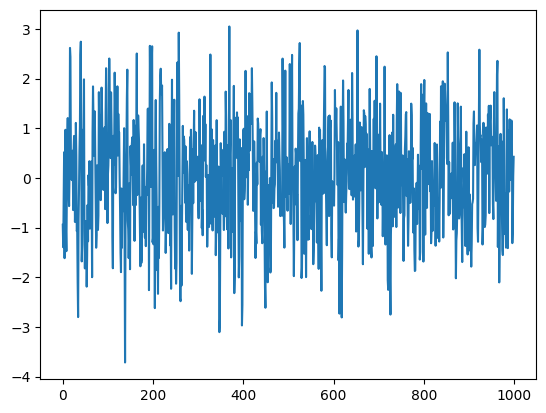

In [1]:
# Simulating an MA Process
from statsmodels.tsa.arima_process import ArmaProcess
import numpy as np
import matplotlib.pyplot as plt

# Unlik with the AR simuation, you don´t need to reverse the sign of theta.
ar = np.array([1])
ma = np.array([1, 0.5])
AR_object= ArmaProcess(ar, ma)
simulated_data = AR_object.generate_sample(nsample = 1000)
plt.plot(simulated_data)

### Simulate MA(1) Time Series

You will simulate and plot a few MA(1) time series, each with a different parameter, $\theta$, using the **arima_process** module in statsmodels, just as you did in the last chapter for AR(1) models. You will look at an MA(1) model with a large positive $\theta$ and a large negative $\theta$.

As in the last chapter, when inputting the coefficients, you must include the zero-lar coefficient of 1, but unlike the last chapter on AR models, the sign of the MA coefficients is what whe would expect- For example, for an MA(1) process with $\theta = -0.9$, the array representing the MA parameters would be. **ma = np.array([1, -0.9)**.


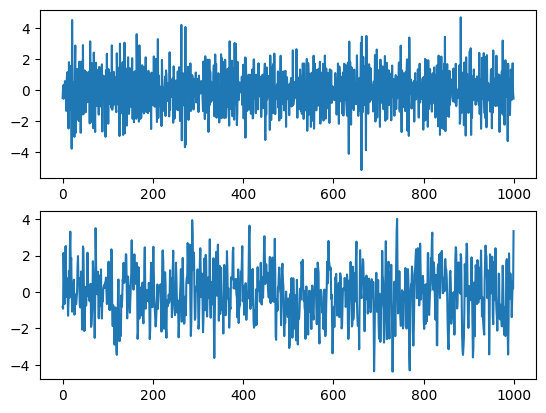

In [2]:
# import the module for simulating data
from statsmodels.tsa.arima_process import ArmaProcess

# Plot 1: MA parameter = -0.9
plt.subplot(2,1,1)
ar1 = np.array([1])
ma1 = np.array([1, -0.9])
MA_object1 = ArmaProcess(ar1, ma1)
simulated_data_1 = MA_object1.generate_sample(nsample=1000)
plt.plot(simulated_data_1)

# Plot 2: MA parameter = +0.9
plt.subplot(2,1,2)
ar2 = np.array([1])
ma2 = np.array([1, +0.9])
MA_object2 = ArmaProcess(ar2, ma2)
simulated_data_2 = MA_object2.generate_sample(nsample=1000)
plt.plot(simulated_data_2)

plt.show()

### Compute the ACF for Several MA Time Series

Unlike an AR(1), an MA(1) model has no autocorrelation beyond lag-1, an MA(2) model has no autocorrelation beyond lag-2, etc. The lag-1 autocorrelation for an MA(1) model is not $\theta$, but rather $\frac{\theta}{(1 + \theta^{2})}$. For example if the MA parameter, $\theta$, is = 0.9, the first lag auticorrelation will be $\frac{0.9}{(1 + 0.9^{2})} = 0.497$ and the autocorrelation at all other lags will be zero. If the MA parameter, $\theta$, is $-0.9$, the first lag autocorrelation will be $\frac{-0.9}{(1 - 0.9^{2})} = -0.497$

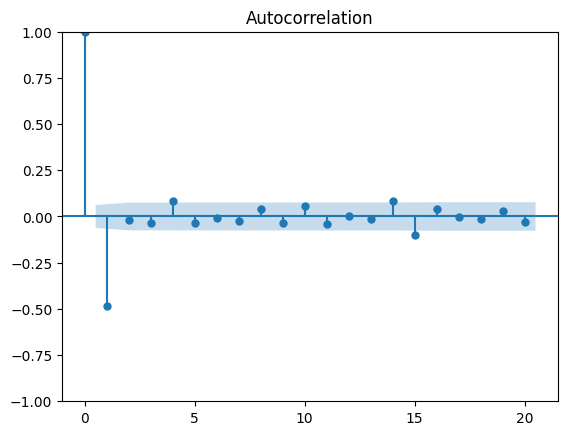

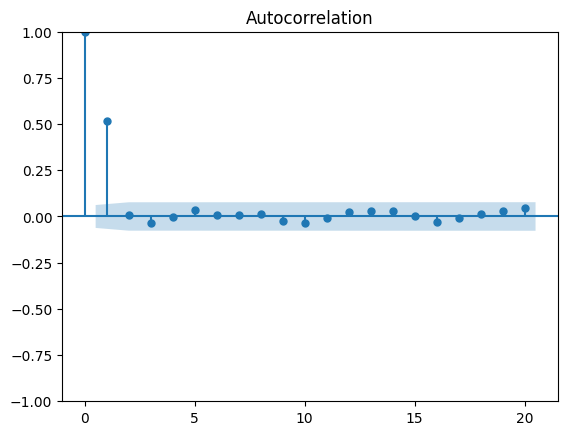

In [3]:
# Import the plot_acf module from statsmodels
from statsmodels.graphics.tsaplots import plot_acf

# Plot 1: MA parameter = -0.9
plot_acf(simulated_data_1, lags = 20)
plt.show()

# Plot 2: MA parameter = 0.9
plot_acf(simulated_data_2, lags = 20)
plt.show()

## Estimating and Forecasting an MA Model

The same module that you used to estimate the parameters of an AR model can be used to estimate the parameters of an MA model. Impor the class ARIMA as before, and create an instance of that class called mod, with the arguments being the data that you´re trying to fit, and the order of the model. However, now the order is (0,0,1), for an MA(1), not (1,0,0) as it was for an AR(1). And as before with an AR model, once you instantiate the class, you can then use the method to fit to estimate the model and store the results.

In [5]:
from statsmodels.tsa.arima.model import ARIMA
mod = ARIMA(simulated_data, order = (0, 0, 1))
result = mod.fit()
print(result)

The procedure for forecasting an MA model is the same as for an AR model: you have to import the statsmodels function plot_predict. The first argument in the plot_predict function is the result from the fitted model. You also give plot_predict the sharing and ending data points for forecasting. And you set ax equal to az so that the data and the prediction are on the same axes. One thing to note, is that with an MA(1) model, unlike an AR model, all forecast beyond the one-step ahead forecast will be the same.

In [ ]:
from statsmodels.graphics.tsaplots import plot_predict
fig, ax = plt.subplots()
data.plot(ax=ax)
plot_predict(resm start = "2012-09-27", end = "2012-10-06", ax = ax)
plt.show()

### Estimating an MA Model

You will estimate the MA(1) parameter, $\theta$, of one of the simulated series that you generated in the earilier excercise. Since the parameters are known for a simulated series, it is a good way to understand the estimation routines before applying it to real data.

In [6]:
# import the ARIMA module from statsmodels
from statsmodels.tsa.arima.model import ARIMA

# Fit an MA(1) model to the first simulated data
mod = ARIMA(simulated_data_1, order = (0, 0, 1))
res = mod.fit()

# Print out summary information on fit
print(res.summary())

# Print out the estimate for the constant and for theta
print("When the true theta=-0.9, the estimate of theta is:")
print(res.params[1])

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1000
Model:                 ARIMA(0, 0, 1)   Log Likelihood               -1438.327
Date:                Mon, 24 Apr 2023   AIC                           2882.654
Time:                        23:25:28   BIC                           2897.378
Sample:                             0   HQIC                          2888.250
                               - 1000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0011      0.003     -0.404      0.686      -0.006       0.004
ma.L1         -0.9182      0.013    -72.071      0.000      -0.943      -0.893
sigma2         1.0376      0.047     22.091      0.0

### Forecasting with MA Model

As you did with AR models to forecast in-sample and out-of-sample data using **plot_predict()** function in statsmodels.

For the simulated series **simulated_data_1** with $\theta = -0.9$, you will plot in-sample and out-of-sample forecasts. One big difference you will see between out-of-sample forecast with an MA(1) model an AR(1) model is that the MA(1) model forecast more than one period in the future are simply the mean of the sample.

In [ ]:
# Import the ARIMA and plot_predict from statsmodels
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_predict

# Forecast the first MA(1) model
mod = ARIMA(simulated_data_1, order= (0,0,1))
res = mod.fit()

# Plot the data and the forecast
fig, ax = plt.subplots()
simulated_data_1.loc[950:].plot(ax=ax)
plot_predict(res, start=1000, end=1010, ax=ax)
plt.show()

# ARMA models

An ARMA model is a combination of an AR and MA model. Here is the formula of an ARMA(1,1) model, which has the familiar AR(1) and MA(1) components.

$$R_{t} = \mu + \phi R_{t-1} + \epsilon_{t} + \theta \epsilon_{t-1}$$

ARMA models can be convert to pure AR or pure MA models. Here is and example of converting an AR(1) model into and MA(infinity) model. The first line is an AR(1) model. Then, in the second line, the AR(1) equation is subtituted for $R_{t-1}$. You do the same for $R_{t-2}$ in the third line, etc., and you eventually end up with an MA(infinity) model with coefficients $\phi$, $\phi^{2}$, $\phi_{3}$, etc.

* Converting AR(1), into an $MA(\infty)$
$$R_{t} = \mu + \phi R_{t-1} + \epsilon_{t}$$
$$R_{t} = \mu + \phi (\mu + \phi R_{t-2} + \epsilon_{t-1}) + \epsilon_{t}$$
$$R_{t} = \frac{\mu}{1-\phi} + \phi \epsilon_{t-1} + \phi^{2} \epsilon_{t-2} + \phi^{3} \epsilon_{t-3} + ...$$


Higer frequency stock data is well modeled by an MA(1) process, so it´s a nice application of the models in this chapter.

In [ ]:
# import datetime module
import datetime

# Change the first date to zero
intraday.iloc[0,0] = 0

# Change the column headers to 'DATE' and 'CLOSE'
intraday.columns = ["DATE","CLOSE"]

# Examine the data types for each column
print(intraday.dtypes)

# Convert DATE column to numeric
intraday['DATE'] = pd.to_numeric(intraday["DATE"])

# Make the `DATE` column the new index
intraday = intraday.set_index("DATE")

Stocks trade at discrete one-cent increments (although a small percentage of trades occur in between the one-cent increments) rather than at continuous prices, and when you plot the data you should observe that there are long periods when the stock bounces back and forth over a one cent range. This is sometimes referred to as "bid/ask bounce".

In [ ]:
# Everything
set_everything = set(range(391))

# The intraday index as a set
set_intraday = set(intraday.index)

# Calculate the difference
set_missing = set_everything - set_intraday

# Print the difference
print("Missing rows: ", set_missing)

# From previous step
intraday = intraday.reindex(range(391), method='ffill')

# Change the index to the intraday times
intraday.index = pd.date_range(start= "2017-09-01 9:30", end= "2017-09-01 16:00", freq= "1min")

# Plot the intraday time series
intraday.plot(grid=True)
plt.show()

La función intraday.reindex(range(391), method='ffill') en Pandas se utiliza para reindexar un DataFrame intraday con una nueva secuencia de etiquetas de fila. En este caso, la secuencia de etiquetas de fila es generada por la función range(391), que crea una secuencia de números enteros de 0 a 390.

La opción method='ffill' se utiliza para llenar cualquier valor faltante en el DataFrame con el último valor válido conocido hacia adelante. La abreviatura "ffill" significa "forward fill" y es una técnica comúnmente utilizada para llenar valores faltantes en series de tiempo.

En resumen, la función intraday.reindex(range(391), method='ffill') está reindexando el DataFrame intraday con una nueva secuencia de etiquetas de fila que van de 0 a 390, y llenando cualquier valor faltante con el último valor conocido hacia adelante en la serie de tiempo. Esto asegura que el DataFrame tenga exactamente 391 filas y que todos los valores faltantes sean llenados con los valores previos conocidos.

### Applying an MA Model

The bouncing of the stock price between bid and ask induces a negative first order autocorrelation, but not autocorrelation at lags higer than 1. You get the same ACF patter with an MA(1) model. Therefore, you will fit an MA(1) model to the instraday stcok data from the last exercise.

The first step is to compute minute-by-minute returnd from the prices in **instraday**,and plot the autocorrelation function. You should observe that the ACF looks like an MA(1) process. Then, fit the data to an MA(1), the same way you did for simulated data.

In [ ]:
# Import plot_acf and ARIMA modules from statsmodels
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima.model import ARIMA

# Compute returns from prices and drop the NaN
returns = intraday.pct_change()
returns = returns.dropna()

# Plot ACF of returns with lags up to 60 minutes
plot_acf(returns, lags = 60)
plt.show()

# Fit the data to an MA(1) model
mod = ARIMA(returns, order=(0,0,1))
res = mod.fit()
print(res.params[1])

### Equivalence of AR(1) and MA(infinity)

To better understand the relationship between MA models and AR models, you will demonstrate that an AR(1) model is equivalent to an MA($\infy$) model with the appropriate parameters.

You will simulate an MA model with parameters 
$0.8$,$0.8^{2}$,$0.8{3}$,... for a large number (30) lags and show that it has the same Autocorrelation Function as an AR(1) model with $\phi = 0.8$.

Note, to raise a number x to the power of an exponent n, use the format x**n.

In [ ]:
# import the modules for simulating data and plotting the ACF
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.tsaplots import plot_acf

# Build a list MA parameters
ma = [0.8**i for i in range(30)]

# Simulate the MA(30) model
ar = np.array([1])
AR_object = ArmaProcess(ar, ma)
simulated_data = AR_object.generate_sample(nsample=5000)

# Plot the ACF
plot_acf(simulated_data, lags=30)
plt.show()

# Putting it All Together

This chapter will show you how to model two series jointly using cointegration models. Then you´ll wrap up with a case study where you look at a time series of temperature data from NY.

## Cointegration Models

The idea behind cointegration is that even if the prices of two different assets both follow random walks, it is still possible that a linear combination of them is not a random walk. If that´s true, then even trought P an Q are not forecastable because they´re random walks, the linear combination is forecastable, and we say that P and Q are cointegrated.

* Two series, $P_{t}$ and $Q_{t}$ can be random walks.
* But the linear combination $P_{t} - cQ_{t}$ may not be a random walk!
* If that´s true
    * $P_{t} - cQ_{t} is forecastable
    * $P_{t}$ and $Q_{t}$ are said to be cointegrated.
    
The bes analogy I´ve heard is of a dog owner walking his dog a retractable leash. If you look at the position of the dog howner, it may follow a random walk, aind if you look at the position of the dog separately, it may also follow a random walk, but the distance between them, the difference of their positions, may very wel be mean reverting: if the dog is behind the owner, he may run to catch up and if the dog is ahead, the legth of the leash may prevent him for getting too far ahead. The dog and its ownes are linked together and their distance is a mean reverting process.

* $P_{t}$ = Owner
* $Q_{t}$ = Dog

* Both series look like a random walk
* Difference, or distance between them, looks mean reverting.
    * If dog falls too far behind, it gets puled foward
    * If dog gets too far ahead, it gets pulled back.

Both Heating Oil prices and Natural Gas prices look like they´re random walks. But when you look at the srpead, of difference between them, the series look like it´s mean reverting. For example, when heating oil spiked down relative to natural gas in 2001, the spread reverted back.

You can brack down the proces for testing whether two series are cointegrated into two steps. First, you regress the level of one series on the level of the other series, to get the slope coefficient c. Then you run the Augmented Dickey Fuller test. Alternatibely, statsmodels has a function **coint** that combines both steps.

* Regress $P_{t}$ on $Q_{t}$ and get slope $c$
* Run Augmented Dickey-Fuller test on $P_{t}-cQ_{t}$ to test for random walk.
* Alternatuvely, you can use *coint* function in statsmodels that combines both steps

In [ ]:
from statsmodels.tsa.stattools import coint
coint(P,Q)

The Heating Oil and Natural Gas prices are pre-loaded in DataFrames HO and NG. First, plot both price series, which look like random walks. Then plot the difference between the two series, which should look more like a mean reverting series (to put the two series in the same units, we multiply the heating oil prices, in $/gallon, by 7.25, which converts it to $/millionBTU, which is the same units as Natural Gas).


In [ ]:
# Plot the prices separately
plt.subplot(2,1,1)
plt.plot(7.25*HO, label='Heating Oil')
plt.plot(NG, label='Natural Gas')
plt.legend(loc='best', fontsize='small')

# Plot the spread
plt.subplot(2,1,2)
plt.plot(7.25*HO-NG, label='Spread')
plt.legend(loc='best', fontsize='small')
plt.axhline(y=0, linestyle='--', color='k')
plt.show()

To verify that Heating Oil and Natural Gas prices are cointegrated, First apply the Dickey-Fuller test separately to show they are random walks. Then apply the test to the difference, which should strongly reject the random walk hypothesis. The Heating Oil and Natural Gas prices are pre-loaded in DataFrames HO and NG.

In [ ]:
# Import the adfuller module from statsmodels
from statsmodels.tsa.stattools import adfuller

# Compute the ADF for HO and NG
result_HO = adfuller(HO["Close"])
print("The p-value for the ADF test on HO is ", result_HO[1])
result_NG = adfuller(NG['Close'])
print("The p-value for the ADF test on NG is ", result_NG[1])

# Compute the ADF of the spread
result_spread = adfuller(7.25 * HO["Close"] - NG["Close"])
print("The p-value for the ADF test on the spread is ", result_spread[1])

### Are Bitcoin and Ethereum Cointegrated?

Cointegration involves two steps: regressing one time series on the other to get the cointegration vector and ADF tes on the residuals of the regression. In the last example, there was no need to perform the first step since we implicity assumed the cointegration vector was (1, -1). In other word, we took the difference between the two series (after doing a units conversion). Here you will do both steps.

You will regress the value of one cryptocurrency, bitcoin (BTC), on another cryptocurrency, athereum (ETH). If we call the regression coefficient *b*, the the cointegration vector is simply $(1,-b)$. Then perform the ADF test on the BTC-bETH.

In [ ]:
# Import the statsmodels module for regression and the adfuller function
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

# Regress BTC on ETH
ETH = sm.add_constant(ETH)
result = sm.OLS(BTC,ETH).fit()

# Compute ADF
b = result.params[1]
adf_stats = adfuller(BTC['Price'] - b*ETH['Price'])
print("The p-value for the ADF test is ", adf_stats[1])

## Case Study: Climate Change

As a final excercise that will pull togheter many of the concepts throught this course, you´ll analyze some temperature data taken over almost 150 years. The data was downloades from NOAA, website. First, you´ll practice some pandas methos by converting the index to datetime and plotting the data. Then, you´ll run the Augmented Dickey-Fuller test to see wheater the data is a Random Walk. Then, you´ll take first differences of the data to transform it into stationary series, and compute the Autocorrelation Function and the Partial Autocorrelation Function of the data. Then you´ll use the Information Criterion to chose the best model among that ones you looked at. Finally, with the best model, you´ll forecast temperatures over the next 30 years.

This the steps of the workflow.
* Test for Random Walk
* Take first differences.
* Compute ACF and PACF.
* Fit a Few AR, MA, and ARMA models.
* Use the information Criterion to choosse best model
* Forecast the variable.

### Is temperature a Random Walk (With Drift)?

An ARMA model is a simplistic approach to forecasting climate changes, but it illustrates many of the topics covered in this class.

In [ ]:
# Import pandas as pd
import pandas as pd
# Import adfulled function from statsmodels module
from statsmodels.tsa.stattools import adfuller
# Import matplotlib as plt
import matplotlib.pyplot as plt

# Convert the index to a datetime object
temp_NY.index = pd.to_datetime(temp_NY.index, format = "%Y")

# Plot average temperatures
temp_NY.plot()
plt.show()

# Compute and print ADF p-value
result = adfuller(temp_NY["TAVG"])
print("The p-value of the ADF test is ", result[1])

### Getting "Warmed" Up: Look at Autocorrelations

Scine the temperature series, temp_NY, is a random walk with drift, take the first differences to make it stationary. Then compute the sample ACF and PACF. This will provide some guidance on the order of the model.

There is no clear pattern in the ACF and PACF except the negative lag-1 autocorrelation in the ACF.

In [ ]:
# Import the modules for plotting the sample ACF and PACF
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Take the first difference of the temperature Series
chg_temp = temp_NY.diff()
chg_temp = chg_temp.dropna()

# Plot the ACF and PACF on the same page
fig, axes = plt. subplots(2,1)

# Plot the PACF
plot_pacf(chg_temp, lags = 20, ax = axes[1])
plt.show()

### Which ARMA model is Best?

Recall from Chapter 3 that the Akaike Information Criterion (AIC) can be used to compare models with differen numbers of parameters. It measures goodness-of-fit, but places a penalty on models with mode parametes to discourage overfiting. **Lower AIC scores are better**.

Fit the temperature data to an AR(1), AR(2), and ARMA(1,1) and see which model is the best fit, using the AIC criterion. The AR(2) and ARMA(1,1) models ve one more parameter than the AR(1) has.

In [ ]:
# Import the module for estimating an ARIMA model
from statsmodels.tsa.arima.model import ARIMA

# Fit the data to an AR(1) model an print AIC:
mod_ar1 = ARIMA(chg_temp, order = (1,0,0))
res_ar1 = mod.fit()
print("The AIC for an AR(1) is: ", res_ar1.aic)

# Fit the data to an AR(2) model and princ AIC:

# Import the module for estimating an ARIMA model
from statsmodels.tsa.arima.model import ARIMA

# Fit the data to an AR(1) model and print AIC:
mod_ar1 = ARIMA(chg_temp, order=(1, 0, 0))
res_ar1 = mod_ar1.fit()
print("The AIC for an AR(1) is: ", res_ar1.aic)

# Fit the data to an AR(2) model and print AIC:
mod_ar2 = ARIMA(chg_temp, order=(2, 0, 0))
res_ar2 = mod_ar2.fit()
print("The AIC for an AR(2) is: ", res_ar2.aic)

# Fit the data to an ARMA(1,1) model and print AIC:
mod_arma11 = ARIMA(chg_temp, order = (1,0,1))
res_arma11 = mod_arma11.fit()
print("The AIC for an ARMA(1,1) is: ", res_arma11.aic)

### Don´t throw out that whinter coat yet.

Finally, you will forecast the temperature over the next 30 years using an ARMA(1,1) model, including confidence bands around that estimate. Keep in mind that the estimate of the drift will have a much bigger impact on long range forecasts than the ARMA parameters.

Earlier, you determined that the temperature data follows a random walk and you looked at first differencing the data. In this exercise, you will use the ARIMA module on the temperature data (before differencing), which is identical to using the ARMA module on changes in temperature, followed by taking cumulative sums of these changes to get the temperature forecast.

Because temperatures are trending up over time, you will also need to add a trend component when you define the ARIMA model. In the exercise, you'll use a linear trend with time by setting the argument trend='t'. You can also try other trend models to see how the forecasts change. For example, for a quadratic trend $a+bt+ct^{2}$, set trend=[0,1,1], to include both a linear term $bt$, and quadratic term $ct^{2}$, in the model.

The data is preloaded in a DataFrame called temp_NY

In [ ]:
# Import the ARIMA module from statsmodels
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_predict

# Forecast temperatures using an ARIMA(1,1,1) model
mod = ARIMA(temp_NY, trend='t', order=(1,1,1))
res = mod.fit()

# Plot the original series and the forecasted series
fig, ax = plt.subplots()
temp_NY.plot(ax=ax)
plot_predict(res, start='1872', end='2046', ax=ax)
plt.show()

# Advanced Topics
* GARCH Models.
* Nonlinear Models.
* Multivariate Time Series Models.
* Regime Switching Models.
* State Space Models and Kalmar Filtering.
